In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib as mpl
from sklearn.model_selection import train_test_split

In [2]:
#正常显示中文
mpl.rcParams['font.sans-serif']=[u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
#用于抑制第三方警告
warnings.filterwarnings("ignore")

In [10]:
pd.options.display.max_rows = 10   #最大显示10行
data = pd.read_csv(r"D:\datasets\data.csv",encoding = "gbk")  #读取数据  
data_1 = data.copy()
data_1.describe()

,Unnamed: 0,custid,low_volume_percent,middle_volume_percent,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,trans_activity_month,trans_activity_day,transd_mcc,trans_days_interval_filter,...,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_credibility,consfin_org_count_current,consfin_product_count,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day
count,4754.000000,4.754000e+03,4752.000000,4752.000000,4754.000000,4751.000000,4752.000000,4752.000000,4752.000000,4746.000000,...,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4457.000000,4450.000000,4457.000000
mean,6008.414178,1.690993e+06,0.021806,0.901294,1940.197728,14.160674,0.804411,0.365425,17.502946,29.029920,...,3390.038142,1820.357864,9187.009199,76.042630,4.732331,5.227507,16153.690823,8007.696881,24.112809,55.181512
std,3452.071428,1.034235e+06,0.041527,0.144856,3923.971494,694.180473,0.196920,0.170196,4.475616,22.722432,...,1474.206546,583.418291,7371.257043,14.536819,2.974596,3.409292,14301.037628,5679.418585,37.725724,53.486408
min,5.000000,1.140000e+02,0.000000,0.000000,0.000000,0.000000,0.120000,0.033000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000
25%,3106.000000,7.593358e+05,0.010000,0.880000,0.000000,0.615000,0.670000,0.233000,15.000000,16.000000,...,2300.000000,1535.000000,4800.000000,77.000000,2.000000,3.000000,7800.000000,4737.000000,5.000000,10.000000
50%,6006.500000,1.634942e+06,0.010000,0.960000,500.000000,0.970000,0.860000,0.350000,17.000000,23.000000,...,3100.000000,1810.000000,7700.000000,79.000000,4.000000,5.000000,13800.000000,7050.000000,14.000000,36.000000
75%,8999.000000,2.597905e+06,0.020000,0.990000,2000.000000,1.600000,1.000000,0.480000,20.000000,32.000000,...,4300.000000,2100.000000,11700.000000,80.000000,7.000000,7.000000,20400.000000,10000.000000,24.000000,91.000000
max,11992.000000,4.004694e+06,1.000000,1.000000,68000.000000,47596.740000,1.000000,0.941000,42.000000,285.000000,...,10000.000000,6900.000000,87100.000000,87.000000,18.000000,20.000000,266400.000000,82800.000000,360.000000,323.000000


In [11]:
#将空值替换为np.nan
for columns in data_1.columns:
    data_1.loc[data_1[columns] == "NA",columns] = np.nan 

In [12]:
#删除无效特征
Irrelevant_features = ['Unnamed: 0', 'custid', 'trade_no', 'bank_card_no', 'source', 'id_name', 'latest_query_time','loans_latest_time']
data_2 = data_1.drop(Irrelevant_features,axis = 1)

In [13]:

#根据reg_preference_for_trad删除空值
data_3 = data_2.dropna(subset = ["reg_preference_for_trad"])
data_3 = data_2.dropna(subset = ["status"])

#在指定阈值的前提下对特征进行删除 
data_3 = data_3.dropna(axis = 1,thresh = 1000)
data_3 = data_3.dropna(axis = 0,thresh = 75)

#对空值采用均值进行填充
data_3 = data_3.fillna(data_3.mean())
print(data_3.shape)

(4423, 82)


In [4]:
#去除标签
data_non_labels = data_3.drop("status",axis = 1)

#采样标签
data_labels = data_3["status"]

#切分数据集
X_train_set,X_test_set,y_train_set,y_test_set = train_test_split(data_non_labels,data_labels,test_size = 0.3,random_state = 2018)
print(X_train_set.shape)

#取reg_preference_for_trad
reg_preference_for_trad = X_train_set["reg_preference_for_trad"].copy()
print(reg_preference_for_trad.shape)

#去除reg_preference_for_trad
data_non_reg_preference = X_train_set.drop("reg_preference_for_trad",axis = 1)
print(data_non_reg_preference.shape)

#对数据进行归一化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_non_reg_preference_scalered = scaler.fit_transform(data_non_reg_preference)
print(data_non_reg_preference_scalered.shape)

#尝试着将城市信息转变为onehot矩阵  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
encoder = LabelEncoder().fit_transform(reg_preference_for_trad)
reg_preference_encodered =  OneHotEncoder().fit_transform(encoder.reshape(-1,1)).toarray()
print(reg_preference_encodered.shape)

#将reg_preference_for_trad再添加进去
data_prepared = np.hstack((data_non_reg_preference_scalered,reg_preference_encodered))
print(data_prepared.shape)

(4423, 82)
(3096, 81)
(3096,)
(3096, 80)
(3096, 80)
(3096, 5)
(3096, 85)


In [5]:
def plot_precision_recall_threshold(precisions,recalls,threshold):
    plt.plot(threshold,precisions[:-1],"b-",label = "Precision")
    plt.plot(threshold,recalls[:-1],"g--",label = "recall")
    plt.xlabel("threshold")
    plt.ylabel("Precisions-Recall")
    plt.ylim([0,1])
    plt.legend(loc = "best")
    plt.show()
    
def plot_precision_recall_curve(precisions,recalls):
    plt.plot(recalls,precisions,"b-",label = "precision-recall")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc = "best")
    plt.show()
    
def plot_fpr_tpr_curve(fpr,tpr,label = None):
    plt.plot(fpr,tpr,linewidth = 2,label = label)
    plt.axis([0,1,0,1])
    plt.plot([0,1],[0,1],"k--")
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.show()

In [14]:
data_labels = y_train_set

print(data_prepared.shape)
print(data_labels.shape)

(3096, 85)
(3096,)


In [19]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
data_labels = y_train_set
lin_reg.fit(data_prepared,data_labels)

#线性回归欠拟合
from sklearn.metrics import mean_squared_error  #采用均方误差进行评价
some_data = data_prepared[:5,:]
some_data_labels = data_labels[:5]

lin_predictions_all = lin_reg.predict(data_prepared)

#J均方根误差
lin_mse = mean_squared_error(data_labels,lin_predictions_all)
print(lin_mse)

0.13794825242546802


0.187015503875969
4折交叉验证误差:  [-0.2002584  -0.20671835 -0.2002584  -0.19638243]
4折交叉验证准确率:  [0.7997416  0.79328165 0.7997416  0.80361757]
Precision score:  0.7166276346604216
Recall score:  0.4005235602094241
F1 score:  0.5138539042821159
(3065,)
(3065,)
(3064,)

Drawing precisions-recalls graphics


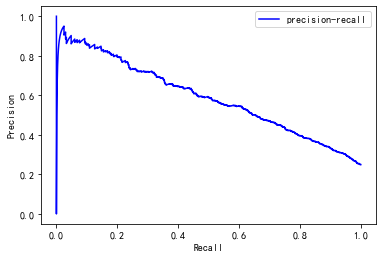

Drawing precisions-recalls-threshold graphics


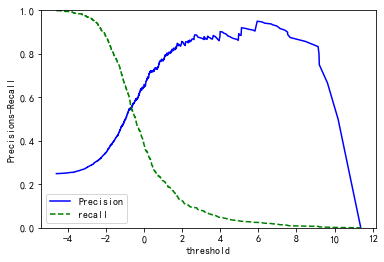

Drawing fpr-tpr graphics


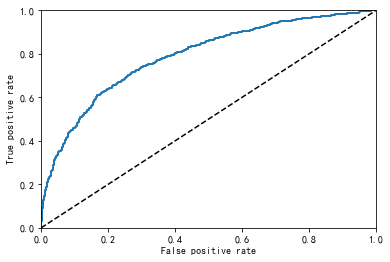

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error  #采用均方误差进行评价

log_reg = LogisticRegression()
log_reg.fit(data_prepared,data_labels)
log_predictions = log_reg.predict(data_prepared)
log_mse = mean_squared_error(data_labels,log_predictions)
print(log_mse)

#4折交叉验证
scores = cross_val_score(log_reg,data_prepared,data_labels,scoring = "neg_mean_squared_error",cv = 4)
print("4折交叉验证误差: ",scores)

#4折交叉验证
scores_1 = cross_val_score(log_reg,data_prepared,data_labels,scoring = "accuracy",cv = 4)
print("4折交叉验证准确率: ",scores_1)

#精确率
log_predictions_all = log_reg.predict(data_prepared)

print("Precision score: ",precision_score(data_labels,log_predictions_all))

#召回率
print("Recall score: ",recall_score(data_labels,log_predictions_all))

#f1值
print("F1 score: ",f1_score(data_labels,log_predictions_all))

#画出P-R曲线
log_scores = cross_val_predict(log_reg,data_prepared,data_labels,cv = 3,method = "decision_function")
precisions_log,recalls_log, thresholds_log = precision_recall_curve(data_labels,log_scores)
print(precisions_log.shape)
print(recalls_log.shape)
print(thresholds_log.shape)

#画fpr，tpr曲线
fpr_log,tpr_log,thresholds_log_roc = roc_curve(data_labels,log_scores)

print()

print("Drawing precisions-recalls graphics")

plot_precision_recall_curve(precisions_log,recalls_log)

print("Drawing precisions-recalls-threshold graphics")
plot_precision_recall_threshold(precisions_log,recalls_log,thresholds_log)

print("Drawing fpr-tpr graphics")
plot_fpr_tpr_curve(fpr_log,tpr_log)

#数据处理不好，特征分析不好，充分说明了垃圾进垃圾出

0.0
4折交叉验证误差:  [0.55065943 0.52975953 0.56270751 0.53775096 0.54416588]
4折交叉验证准确率:  [0.69354839 0.69516129 0.68336026 0.71728595 0.71035599]
Precision score:  1.0
Recall score:  1.0
F1 score:  1.0
(3,)
(3,)
(2,)

Drawing precisions-recalls graphics


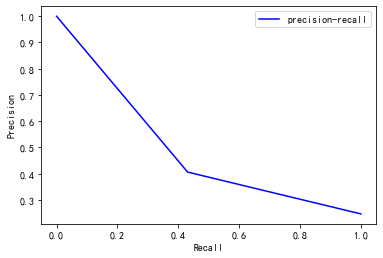

Drawing precisions-recalls-threshold graphics


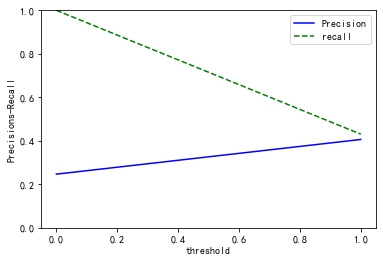

Drawing fpr-tpr graphics


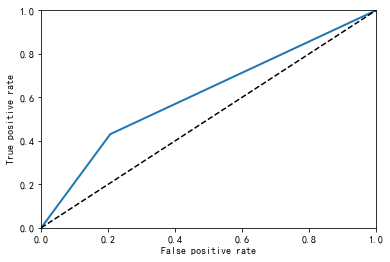

In [27]:
#决策树过拟合  
from sklearn.tree import DecisionTreeClassifier
tree_reg = DecisionTreeClassifier()
tree_reg.fit(data_prepared,data_labels)
tree_predictions = tree_reg.predict(data_prepared)
tree_mse = mean_squared_error(data_labels,tree_predictions)
print(tree_mse)

#5折交叉验证
tree_scores = cross_val_score(tree_reg,data_prepared,data_labels,scoring = "neg_mean_squared_error",cv = 5)
print("4折交叉验证误差: ",np.sqrt(-tree_scores))

#5折交叉验证
tree_scores_1 = cross_val_score(tree_reg,data_prepared,data_labels,scoring = "accuracy",cv = 5)
print("4折交叉验证准确率: ",tree_scores_1)

#精确率
tree_predictions_all = tree_reg.predict(data_prepared)

print("Precision score: ",precision_score(data_labels,tree_predictions_all))

#召回率
print("Recall score: ",recall_score(data_labels,tree_predictions_all))

#f1值
print("F1 score: ",f1_score(data_labels,tree_predictions_all))

#画出P-R曲线
tree_scores = cross_val_predict(tree_reg,data_prepared,data_labels,cv = 3,method = "predict_proba")
precisions_tree,recalls_tree, thresholds_tree = precision_recall_curve(data_labels,tree_scores[:,1])
print(precisions_tree.shape)
print(recalls_tree.shape)
print(thresholds_tree.shape)

#画fpr，tpr曲线
fpr_tree,tpr_tree,thresholds_tree_roc = roc_curve(data_labels,tree_scores[:,1])

print()

print("Drawing precisions-recalls graphics")

plot_precision_recall_curve(precisions_tree,recalls_tree)

print("Drawing precisions-recalls-threshold graphics")
plot_precision_recall_threshold(precisions_tree,recalls_tree,thresholds_tree)

print("Drawing fpr-tpr graphics")
plot_fpr_tpr_curve(fpr_tree,tpr_tree)


0.018733850129198967
4折交叉验证误差:  [-0.21935484 -0.22096774 -0.22132472 -0.21163166 -0.22006472]
4折交叉验证准确率:  [0.77419355 0.76935484 0.75282714 0.79483037 0.77184466]
Precision score:  1.0
Recall score:  0.9240837696335078
F1 score:  0.9605442176870748
(12,)
(12,)
(11,)

Drawing precisions-recalls graphics


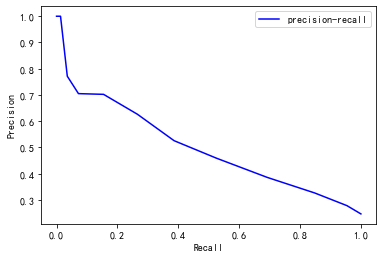

Drawing precisions-recalls-threshold graphics


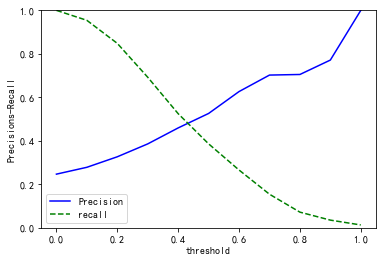

Drawing fpr-tpr graphics


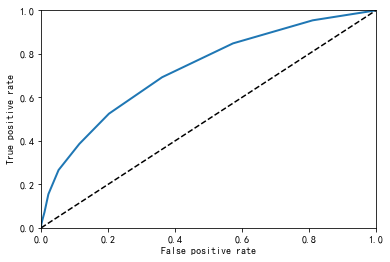

In [29]:
#  随机森林  
from sklearn.ensemble import RandomForestClassifier
forest_reg = RandomForestClassifier()
forest_reg.fit(data_prepared,data_labels)
forest_reg_predictions = forest_reg.predict(data_prepared)

forest_reg_mse = mean_squared_error(data_labels,forest_reg_predictions)
print(forest_reg_mse)
#forest_reg.feature_importances_

#5折交叉验证
random_forest_scores = cross_val_score(forest_reg,data_prepared,data_labels,scoring = "neg_mean_squared_error",cv = 5)
print("4折交叉验证误差: ",random_forest_scores)

#5折交叉验证
random_forest_scores = cross_val_score(forest_reg,data_prepared,data_labels,scoring = "accuracy",cv = 5)
print("4折交叉验证准确率: ",random_forest_scores)

#精确率
random_forest_predictions_all = forest_reg.predict(data_prepared)

print("Precision score: ",precision_score(data_labels,random_forest_predictions_all))

#召回率
print("Recall score: ",recall_score(data_labels,random_forest_predictions_all))

#f1值
print("F1 score: ",f1_score(data_labels,random_forest_predictions_all))

#画出P-R曲线
random_forest_scores = cross_val_predict(forest_reg,data_prepared,data_labels,cv = 3,method = "predict_proba")

precisions_random_forest,recalls_random_forest, thresholds_random_forest = precision_recall_curve(data_labels,random_forest_scores[:,1])
print(precisions_random_forest.shape)
print(recalls_random_forest.shape)
print(thresholds_random_forest.shape)

#画fpr，tpr曲线
fpr_random_forest,tpr_random_forest,thresholds_random_forest_roc = roc_curve(data_labels,random_forest_scores[:,1])

print()

print("Drawing precisions-recalls graphics")

plot_precision_recall_curve(precisions_random_forest,recalls_random_forest)

print("Drawing precisions-recalls-threshold graphics")
plot_precision_recall_threshold(precisions_random_forest,recalls_random_forest,thresholds_random_forest)

print("Drawing fpr-tpr graphics")
plot_fpr_tpr_curve(fpr_random_forest,tpr_random_forest)


5折交叉验证误差:  [-0.1983871  -0.20645161 -0.20840065 -0.20678514 -0.18932039]
5折交叉验证准确率:  [0.80645161 0.79354839 0.78998384 0.79321486 0.80906149]
Precision score:  1.0
Recall score:  0.9240837696335078
F1 score:  0.9605442176870748
(3048,)
(3048,)
(3047,)

Drawing precisions-recalls graphics


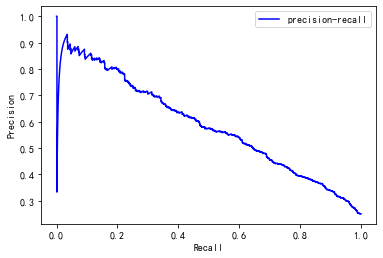

Drawing precisions-recalls-threshold graphics


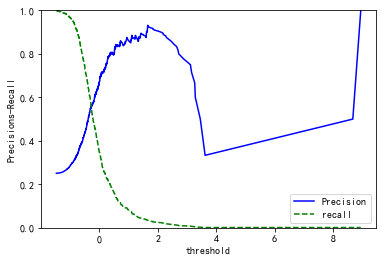

Drawing fpr-tpr graphics


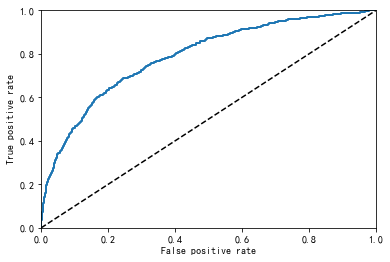

In [30]:
#应用SVC
from sklearn.svm import LinearSVC
svc_reg = LinearSVC()
svc_reg.fit(data_prepared,data_labels)
svc_predictions = svc_reg.predict(some_data)

#5折交叉验证
svc_scores = cross_val_score(svc_reg,data_prepared,data_labels,scoring = "neg_mean_squared_error",cv = 5)
print("5折交叉验证误差: ",svc_scores)

#5折交叉验证
svc_scores = cross_val_score(svc_reg,data_prepared,data_labels,scoring = "accuracy",cv = 5)
print("5折交叉验证准确率: ",svc_scores)

#精确率
svc_predictions_all = forest_reg.predict(data_prepared)

print("Precision score: ",precision_score(data_labels,svc_predictions_all))

#召回率
print("Recall score: ",recall_score(data_labels,svc_predictions_all))

#f1值
print("F1 score: ",f1_score(data_labels,svc_predictions_all))

#画出P-R曲线
svc_scores = cross_val_predict(svc_reg,data_prepared,data_labels,cv = 3,method = "decision_function")

precisions_svc,recalls_svc, thresholds_svc = precision_recall_curve(data_labels,svc_scores)
print(precisions_svc.shape)
print(recalls_svc.shape)
print(thresholds_svc.shape)

#画fpr，tpr曲线
fpr_svc,tpr_svc,thresholds_svc_roc = roc_curve(data_labels,svc_scores)

print()

print("Drawing precisions-recalls graphics")

plot_precision_recall_curve(precisions_svc,recalls_svc)

print("Drawing precisions-recalls-threshold graphics")
plot_precision_recall_threshold(precisions_svc,recalls_svc,thresholds_svc)

print("Drawing fpr-tpr graphics")
plot_fpr_tpr_curve(fpr_svc,tpr_svc)


In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(data_prepared,data_labels)
xgb_predictions = xgb.predict(some_data)

#5折交叉验证
xgb_scores = cross_val_score(xgb,data_prepared,data_labels,scoring = "neg_mean_squared_error",cv = 5)
print("5折交叉验证误差: ",svc_scores)

#5折交叉验证
xgb_scores_1 = cross_val_score(xgb,data_prepared,data_labels,scoring = "accuracy",cv = 5)
print("5折交叉验证准确率: ",xgb_scores_1)

#精确率
xgb_predictions_all = xgb.predict(data_prepared)

print("Precision score: ",precision_score(data_labels,xgb_predictions_all))

#召回率
print("Recall score: ",recall_score(data_labels,xgb_predictions_all))

#f1值
print("F1 score: ",f1_score(data_labels,xgb_predictions_all))


5折交叉验证误差:  [-0.85773149 -0.51726108 -0.11545009 ... -0.89926033  0.3046757
 -0.4132348 ]
5折交叉验证准确率:  [0.7983871  0.8        0.79806139 0.80613893 0.79288026]
Precision score:  0.8552631578947368
Recall score:  0.5104712041884817
F1 score:  0.639344262295082


(3082,)
(3082,)
(3081,)

Drawing precisions-recalls graphics


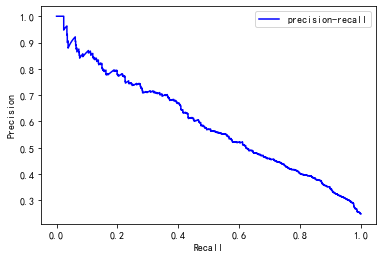

Drawing precisions-recalls-threshold graphics


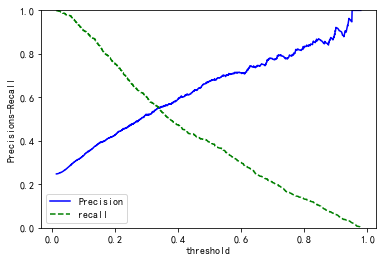

Drawing fpr-tpr graphics


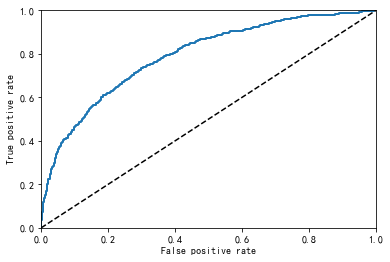

In [36]:
#画出P-R曲线
xgb_scores = cross_val_predict(xgb,data_prepared,data_labels,cv = 3,method = "predict_proba")

precisions_xgb,recalls_xgb, thresholds_xgb = precision_recall_curve(data_labels,xgb_scores[:,1])
print(precisions_xgb.shape)
print(recalls_xgb.shape)
print(thresholds_xgb.shape)

#画fpr，tpr曲线
fpr_xgb,tpr_xgb,thresholds_xgb_roc = roc_curve(data_labels,xgb_scores[:,1])

print()

print("Drawing precisions-recalls graphics")

plot_precision_recall_curve(precisions_xgb,recalls_xgb)

print("Drawing precisions-recalls-threshold graphics")
plot_precision_recall_threshold(precisions_xgb,recalls_xgb,thresholds_xgb)

print("Drawing fpr-tpr graphics")
plot_fpr_tpr_curve(fpr_xgb,tpr_xgb)